In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('MidTermElections.csv')

In [3]:
data = data.loc[:, data.columns.intersection(['text'])]
data.head()

,text
0,@elonmusk @DineshDSouza Look! The jaapie liar ...
1,RT @GTV26543476: 2022年美国中期选举民主共和两党竞争异常激烈，选举结果将...
2,RT @DeMatt1954: @mil_vet17 @TrendingLiberal @K...
3,@_ULTRA_MAGA_ @TruthJustis4USA @DineshDSouza @...
4,@elonmusk @DineshDSouza No...no you are not\nh...


In [4]:
nltk.download('punkt');

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vaishnaviputcha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
data['Cleaned tweets'] = data['text'].apply(clean)
data.head()

,text,Cleaned tweets
0,@elonmusk @DineshDSouza Look! The jaapie liar ...,elonmusk DineshDSouza Look The jaapie liar is...
1,RT @GTV26543476: 2022年美国中期选举民主共和两党竞争异常激烈，选举结果将...,RT GTV https t co EwwLiSlYAX
2,RT @DeMatt1954: @mil_vet17 @TrendingLiberal @K...,RT DeMatt mil vet TrendingLiberal KariLake Wel...
3,@_ULTRA_MAGA_ @TruthJustis4USA @DineshDSouza @...,ULTRA MAGA TruthJustis USA DineshDSouza elonm...
4,@elonmusk @DineshDSouza No...no you are not\nh...,elonmusk DineshDSouza No no you are not https...


In [6]:
#cleaning the tweets
def clean_tweets(tweet):
 
    tweet = re.sub(r':', '', str(tweet))
    tweet = re.sub(r'‚Ä¶', '', str(tweet))
    tweet = re.sub('@[A-Za-z0–9]+', '', str(tweet))               
    tweet = re.sub('#', '', str(tweet)) # Removing '#' hash tag
    tweet = re.sub('https?:\/\/\S+', '', str(tweet)) # Removing hyperlink
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ',str(tweet))
    tweet = str(tweet).lower()
    tweet = re.sub('\[.*?\]', '', tweet)
    tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
    tweet = re.sub('<.*?>+', '', tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('\w*\d\w*', '', tweet)
    tweet = re.sub(r'#','',tweet)
    tweet = re.sub(r'RT[\s]+','',tweet)
    tweet = re.sub(r'[^\w]', ' ', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = re.sub('https ', '', tweet)
    tweet = re.sub('co', '', tweet)

    return tweet

In [7]:
def getSubjectivity(tweet):
    try:
        return TextBlob(tweet).sentiment.subjectivity
    except:
        return None


# Create a function to get the polarity
def getPolarity(tweet):
    try:
        return  TextBlob(tweet).sentiment.polarity
    except:
        return None

def sentiment_calc(tweet):
    try:
        return TextBlob(tweet).sentiment
    except:
        return None

In [8]:
data['edited_tweet'] = data['text'].apply(clean_tweets)

# Polarity

In [9]:
# Create two new columns 'Subjectivity' & 'Polarity'
data['subjectivity'] = data['edited_tweet'].apply(getSubjectivity)
data['polarity'] = data['edited_tweet'].apply(getPolarity)
data['sentiment'] = data['edited_tweet'].apply(sentiment_calc)

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

data['Sentiment'] = data['polarity'].apply(getAnalysis)

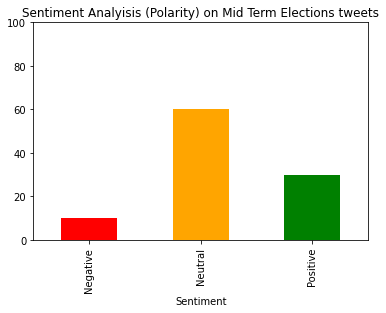

In [10]:
import matplotlib.pyplot as plt
colors = ['red', 'orange', 'green']
data.groupby('Sentiment')['Sentiment'].count().plot.bar(color = colors)
plt.title('Sentiment Analyisis (Polarity) on Mid Term Elections tweets')
plt.ylim(0,100)
plt.show()

In [11]:
data.groupby('Sentiment')['Sentiment'].count()

Sentiment
Negative    10
Neutral     60
Positive    30
Name: Sentiment, dtype: int64

# Subjectivity  

In [12]:
def getAnalysis(score):
    if score < 0:
        return 'Not Valid'
    elif score == 0:
        return 'Factual'
    elif (score > 0 and score < 0.5):
        return 'Biased towards factual'
    elif (score > 0.5 and score < 1):
        return 'Biased towards emotional'
    elif score == 1:
        return 'Emotional'
    else:
        return 'Neither Factual Nor Emotional'
    
data['Subjectivity'] = data['subjectivity'].apply(getAnalysis)
data['subjectivity'] = data['edited_tweet'].apply(getSubjectivity)
data['Subjectivity'] = data['subjectivity'].apply(getAnalysis)

In [13]:
data.groupby('Subjectivity')['Subjectivity'].count()

Subjectivity
Biased towards emotional         17
Biased towards factual           23
Emotional                         1
Factual                          57
Neither Factual Nor Emotional     2
Name: Subjectivity, dtype: int64

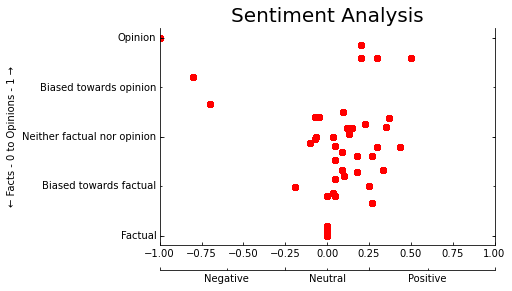

In [14]:
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid.parasite_axes import SubplotHost

fig1 = plt.figure()
ax1 = SubplotHost(fig1, 111)
fig1.add_subplot(ax1)

for index, Tweets in enumerate(data.index):
    x = data['polarity']
    y = data['subjectivity']
    ax1.scatter(x, y, color='Red')

#xlables = ['Negative', 'Neutral', 'Positive']
#ylables = ['']
plt.title('Sentiment Analysis', fontsize = 20)
#plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.xlim(-1,1)
#plt.ylim(0,1)
plt.ylabel('← Facts - 0 to Opinions - 1 →', fontsize=15)

# Second X-axis and Y-axis
ax2 = ax1.twiny()
offset = 0, -25 # Position of the second axis
new_axisline = ax2.get_grid_helper().new_fixed_axis
ax2.axis["bottom"] = new_axisline(loc="bottom", axes=ax2, offset=offset)
ax2.axis["top"].set_visible(False)

ax2.set_xticks([-1.00, -0.25, 0.25, 1.00])
ax2.xaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_minor_locator(ticker.FixedLocator([-0.60, 0.00, 0.60]))
ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(['Negative', 'Neutral', 'Positive']))


ax2.set_yticks([0.00, 0.50, 1.00])
ax2.yaxis.set_major_formatter(ticker.NullFormatter())
ax2.yaxis.set_minor_locator(ticker.FixedLocator([0.00, 0.25, 0.5, 0.75, 1.00]))
ax2.yaxis.set_minor_formatter(ticker.FixedFormatter(['Factual', 'Biased towards factual', 
                                                     'Neither factual nor opinion', 'Biased towards opinion',
                                                    'Opinion']))
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()